<a name="top"></a><img src="source/SpinalHDL.png" alt="SpinalHDL based on Scala" style="width:320px;" />

  Before running Spinal HDL code, be sure to load SpinalHDL Libraries  
**Note** : This may be a little slow when the first time load, please wait a moment to download Lib from remote.

In [ ]:
val path = System.getProperty("user.dir") + "/source/load-spinal.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

<h1>$\color{#FF3030}{Not Ready，Under Construction....}$<h1>

## Reflactor


深入理解scala反射https://juejin.im/post/5c9a4b10f265da60f6731913

判断是否为某个类的实例有两种方式：

- 用 instanceof 关键字
`a.instanceof(classOf[A])`
- 用 Class 对象的 isInstance 方法（它是一个 Native 方法）
`classOf[A].isInstance(a)`

### 反射的应用

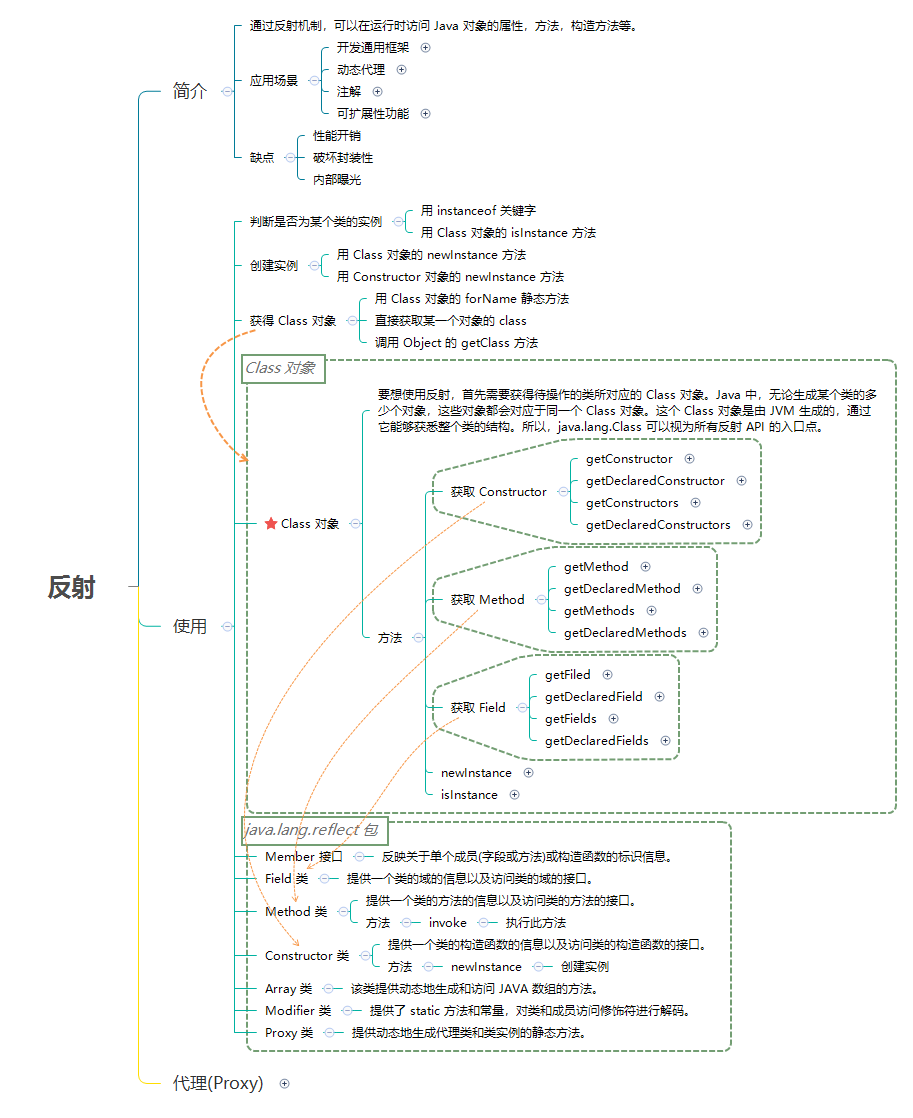

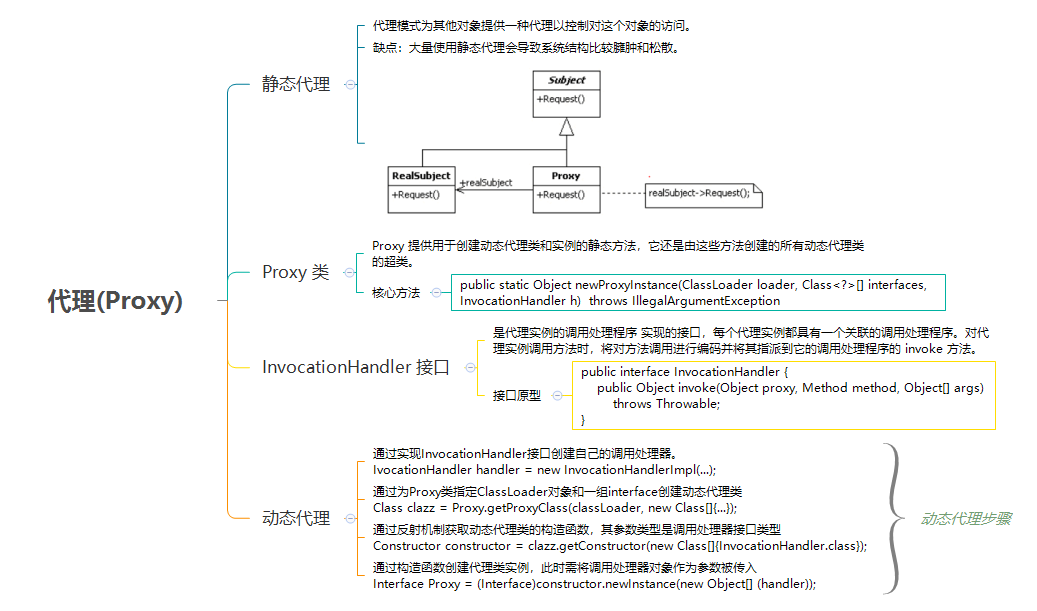

In [ ]:
class Person(n: String, a: Int){
  def eat(a:String) = print(a)
  def play() = print("fun2")
  val name = n
  val age = a 
} 
val a = new Person("jack",28)
classOf[Person].getDeclaredMethods
classOf[Person] isInstance a
a.getClass 
a.getClass.getSimpleName
classOf[Person].getMethod("play") 
//classOf[Person].getMethod("eat") 
classOf[Person].getDeclaredConstructors.head
classOf[Person].getDeclaredFields
classOf[Person].getDeclaredField("name")

In [ ]:
class Module 
class MyTop extends Module{
    val a = 12
    val b = 13
}
val c = new MyTop
c.getClass.getSimpleName
c.getClass.getDeclaredFields

In [ ]:
abstract class Sex
object Male extends Sex
object Female extends Sex
case class School(name:String)
object Utils{
    def play(a: String,b:String) = {println(s"Play $a $b")}
} 
class Jack{
    val age: Int = 28
    val local:String = "USA"
    private val sex: Sex = Male
    val school = School("NanJing Number 1")
    val myplay = Utils.play _
    def eat()={println("Jack eating")}
}
val jack = new Jack
jack.myplay("BasketBall","!!")

In [ ]:
jack.getClass.getDeclaredFields
jack.getClass.getDeclaredFields.map(_.getName)
//jack.getClass.getField("age")

In [ ]:
jack.getClass.getDeclaredMethods
jack.getClass.getDeclaredMethods.map(_.getName)

In [ ]:
jack.sex.getClass
jack.sex.getClass.getDeclaredFields.map(_.getName)

In [ ]:
jack.school.getClass
jack.school.getClass.getDeclaredFields.map(_.getName)
jack.school.getClass.getDeclaredMethods.map(_.getName)

In [ ]:
//B.scala,主程序入口
object B extends App {
  val classA = Class.forName("AA")
  val method = classA.getDeclaredMethod("fun1", classOf[AA])
  method.invoke(classA.newInstance(), "5")// 如果是Int的话,要用new Integer(5)
  /*
如果类A如下定义:
class A(a:String)
则需要在反射时候添加构造器
val cons = classA.getConstructors
val newInst = cons(0).newInstance("你好")
method.invoke(newInst, "哈哈")
*/
} 
//B.classA
//B.method
 
//val c = classOf[aaaA].getDeclaredMethod("func1",classOf[String])

 

## Print AST structure
```scala
showRaw(reify{
  //your code here like:
  print(2)
})
```

In [ ]:
import scala.reflect.runtime.universe._
case class Student(age: Int)

def inter(namePre: String, sts: Student*) ={
    println(namePre)
    namePre+"!"
}
val jack = Student(12)
val lucy = Student(13) 
val x = reify(inter("M_"),jack,lucy)
showRaw(reify(inter("M_"),jack,lucy))